# **SCRAPPING DATA**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
def scrape_detik(url, min_titles=500):
    titles = []
    page = 1
    while len(titles) < min_titles:
        full_url = f"{url}?page={page}"
        print("Scraping:", full_url)

        r = requests.get(full_url)
        if r.status_code != 200:
            print("Gagal akses:", full_url)
            break

        soup = BeautifulSoup(r.text, "html.parser")

        # Selector untuk judul
        items = soup.find_all("h2", class_="title")
        if not items:
            print("Tidak ada judul ditemukan di halaman", page)
            break

        for item in items:
            judul = item.get_text(strip=True)
            titles.append(judul)

        page += 1
        time.sleep(1)  # supaya aman

    return titles[:min_titles]

In [ ]:
kategori_urls = {
    "Politik": "https://www.detik.com/tag/politik",
    "Ekonomi": "https://www.detik.com/tag/ekonomi",
    "Olahraga": "https://www.detik.com/tag/olahraga",
    "Selebritas": "https://www.detik.com/tag/seleb",
    "Teknologi": "https://www.detik.com/tag/teknologi"
}

all_data = []
for kategori, url in kategori_urls.items():
    judul_list = scrape_detik(url, min_titles=500)
    for j in judul_list:
        all_data.append({"JUDUL": j, "KATEGORI": kategori})

df = pd.DataFrame(all_data)

df.to_csv("berita_detik_5_kategori.csv", index=False, encoding="utf-8-sig")

print("Total data:", len(df))
df.head()

Scraping: https://www.detik.com/tag/politik?page=1
Scraping: https://www.detik.com/tag/politik?page=2
Scraping: https://www.detik.com/tag/politik?page=3
Scraping: https://www.detik.com/tag/politik?page=4
Scraping: https://www.detik.com/tag/politik?page=5
Scraping: https://www.detik.com/tag/politik?page=6
Scraping: https://www.detik.com/tag/politik?page=7
Scraping: https://www.detik.com/tag/politik?page=8
Scraping: https://www.detik.com/tag/politik?page=9
Scraping: https://www.detik.com/tag/politik?page=10
Scraping: https://www.detik.com/tag/politik?page=11
Scraping: https://www.detik.com/tag/politik?page=12
Scraping: https://www.detik.com/tag/politik?page=13
Scraping: https://www.detik.com/tag/politik?page=14
Scraping: https://www.detik.com/tag/politik?page=15
Scraping: https://www.detik.com/tag/politik?page=16
Scraping: https://www.detik.com/tag/politik?page=17
Scraping: https://www.detik.com/tag/politik?page=18
Scraping: https://www.detik.com/tag/politik?page=19
Scraping: https://www

,JUDUL,KATEGORI
0,Kantor DPD Golkar Maluku Diserang saat Penguru...,Politik
1,"PPP Konflik di Ancol, Padam di Kuningan",Politik
2,Adu Jotos Muktamar Partai Ka'bah,Politik
3,Melihat Ketahanan Otoritarianisme Demokratis,Politik
4,Ekonomi Politik Seafood,Politik


# **PRE PROCESSING**

# Langkah 1 – Import Library & Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/berita_detik_5_kategori.csv")

df.head()

,JUDUL,KATEGORI
0,"PPP Konflik di Ancol, Padam di Kuningan",Politik
1,Adu Jotos Muktamar Partai Ka'bah,Politik
2,Melihat Ketahanan Otoritarianisme Demokratis,Politik
3,Ekonomi Politik Seafood,Politik
4,"Jokowi Kumpul dengan Elite PSI di Bali, Beri I...",Politik


# Langkah 2 – Cek & Bersihkan Data Kosong/Duplikat

In [ ]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JUDUL     2500 non-null   object
 1   KATEGORI  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [ ]:
# Cek nilai kosong dan duplikat
print("Missing values:", df.isnull().sum().sum())
print("Duplikat:", df.duplicated().sum())

Missing values: 0
Duplikat: 627


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Cek ulang jumlah data
print("Jumlah data setelah dibersihkan:", len(df))

Jumlah data setelah dibersihkan: 1873


In [ ]:
print("Duplikat:", df.duplicated().sum())

Duplikat: 0


# Langkah 3 – Ubah ke Huruf Kecil (Lowercase)

In [ ]:
# Pastikan semua nilai bertipe string dulu
df["JUDUL"] = df["JUDUL"].astype(str)

# Ubah semuanya ke huruf kecil
df["JUDUL"] = df["JUDUL"].str.lower()

# Cek lagi
(df["JUDUL"].str.islower()).value_counts()

,count
JUDUL,
True,1873


In [ ]:
df["JUDUL"].head(10)

,JUDUL
0,"ppp konflik di ancol, padam di kuningan"
1,adu jotos muktamar partai ka'bah
2,melihat ketahanan otoritarianisme demokratis
3,ekonomi politik seafood
4,"jokowi kumpul dengan elite psi di bali, beri i..."
5,rasionalitas pemilih indonesia
6,momen petinggi parpol non parlemen kumpul di k...
7,"pakai sarung-peci, kaesang sowan ke cak imin d..."
8,relawan prabowo-gibran penuhi stadion gelora d...
9,begini situasi kampanye akbar ganjar pranowo d...


# Langkah 4 – Hapus Simbol, Tanda Baca, dan Angka

In [ ]:
import re

df["JUDUL"] = df["JUDUL"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df["JUDUL"].sample(10)

,JUDUL
1074,judo denpasar kali beruntun juara umum porpro...
528,video dpr kritik suntikan dana rp t jadi beba...
56,mencerna makna gibran dan dasco berfoto di mej...
1125,kebiasaan sederhana yang tak disangka bantu ce...
2072,video bukan it ini jurusan yang disarankan bos...
2432,kasur pintar yang bisa bikin hubungan lebih intim
2146,dua ceo paling cerdas menurut orang terkaya di...
1605,lesti kejora umumkan hamil anak kedua
31,video ma thailand vonis thaksin harus kembali ...
1271,pelari as alami insiden mr p selip saat lomba ...


In [ ]:
cek = df[df["JUDUL"].str.contains(r'[^a-zA-Z\s]', regex=True)]
print("Jumlah baris yang masih kotor:", len(cek))

Jumlah baris yang masih kotor: 0


# Langkah 5 – Tokenisasi

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <--- tambahkan ini

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["tokens"] = df["JUDUL"].apply(nltk.word_tokenize)
df.head()

,JUDUL,KATEGORI,tokens
0,ppp konflik di ancol padam di kuningan,Politik,"[ppp, konflik, di, ancol, padam, di, kuningan]"
1,adu jotos muktamar partai kabah,Politik,"[adu, jotos, muktamar, partai, kabah]"
2,melihat ketahanan otoritarianisme demokratis,Politik,"[melihat, ketahanan, otoritarianisme, demokratis]"
3,ekonomi politik seafood,Politik,"[ekonomi, politik, seafood]"
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"[jokowi, kumpul, dengan, elite, psi, di, bali,..."


# Langkah 6 – Hapus Stopwords Bahasa Indonesia

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

df["tokens"] = df["tokens"].apply(lambda x: [w for w in x if w not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,JUDUL,KATEGORI,tokens
0,ppp konflik di ancol padam di kuningan,Politik,"[ppp, konflik, ancol, padam, kuningan]"
1,adu jotos muktamar partai kabah,Politik,"[adu, jotos, muktamar, partai, kabah]"
2,melihat ketahanan otoritarianisme demokratis,Politik,"[ketahanan, otoritarianisme, demokratis]"
3,ekonomi politik seafood,Politik,"[ekonomi, politik, seafood]"
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"[jokowi, kumpul, elite, psi, bali, instruksi]"


In [ ]:
sisa = {word for tokens in df["tokens"] for word in tokens if word in stop_words}
print("Stopwords tersisa:", sisa)

Stopwords tersisa: set()


# Langkah 7 – Stemming Bahasa Indonesia

In [ ]:
!pip install Sastrawi
# 1️⃣ Import library stemmer Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 2️⃣ Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3️⃣ Terapkan stemming pada token yang sudah dibersihkan
# Ubah setiap token jadi kata dasar lalu gabungkan kembali jadi kalimat
df["stemmed"] = df["tokens"].apply(lambda x: " ".join([stemmer.stem(word) for word in x]))

# 4️⃣ Tampilkan hasil untuk memastikan kolom stemmed muncul setelah tokens
df = df[["JUDUL", "KATEGORI", "tokens", "stemmed"]]

# 5️⃣ Lihat hasil awal
df.head(10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00


,JUDUL,KATEGORI,tokens,stemmed
0,ppp konflik di ancol padam di kuningan,Politik,"[ppp, konflik, ancol, padam, kuningan]",ppp konflik ancol padam kuningan
1,adu jotos muktamar partai kabah,Politik,"[adu, jotos, muktamar, partai, kabah]",adu jotos muktamar partai kabah
2,melihat ketahanan otoritarianisme demokratis,Politik,"[ketahanan, otoritarianisme, demokratis]",tahan otoritarianisme demokratis
3,ekonomi politik seafood,Politik,"[ekonomi, politik, seafood]",ekonomi politik seafood
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"[jokowi, kumpul, elite, psi, bali, instruksi]",jokowi kumpul elite psi bal instruksi
5,rasionalitas pemilih indonesia,Politik,"[rasionalitas, pemilih, indonesia]",rasionalitas pilih indonesia
6,momen petinggi parpol non parlemen kumpul di k...,Politik,"[momen, petinggi, parpol, non, parlemen, kumpu...",momen petinggi parpol non parlemen kumpul diam...
7,pakai sarungpeci kaesang sowan ke cak imin di ...,Politik,"[pakai, sarungpeci, kaesang, sowan, cak, imin,...",pakai sarungpeci kaesang sowan cak imin dpp pkb
8,relawan prabowogibran penuhi stadion gelora de...,Politik,"[relawan, prabowogibran, penuhi, stadion, gelo...",rawan prabowogibran penuh stadion gelora delta...
9,begini situasi kampanye akbar ganjar pranowo d...,Politik,"[situasi, kampanye, akbar, ganjar, pranowo, go...",situasi kampanye akbar ganjar pranowo gor delt...


# Langkah 8 – Simpan Data Hasil Preprocessing

In [ ]:
df.to_csv("berita_clean.csv", index=False, encoding="utf-8-sig")
print("Data hasil preprocessing berhasil disimpan sebagai berita_clean.csv")

Data hasil preprocessing berhasil disimpan sebagai berita_clean.csv


# Langkah 9 – Cek Distribusi Kategori

In [ ]:
df["KATEGORI"].value_counts()

,count
KATEGORI,
Selebritas,410
Politik,385
Ekonomi,369
Teknologi,369
Olahraga,340


Penjelasan:

Selisih antara kategori terbanyak (410) dan paling sedikit (340) cuma 70 data saja dari total 1.873 data.

Artinya variasinya hanya sekitar ±4%–5%, yang masih sangat wajar untuk dataset teks.

Dengan distribusi seperti ini, model machine learning tidak akan bias secara signifikan terhadap satu kategori tertentu.

Kesimpulan:

Dataset kamu seimbang (balanced).

Tidak perlu melakukan balancing tambahan (seperti oversampling atau undersampling).

Kamu bisa langsung lanjut ke tahap ekstraksi fitur (misalnya TF-IDF atau word embeddings) sebelum modeling.

# **FEATURE EXTRACTION**

# Langkah 1 — Import dan Cek Data

In [ ]:
import pandas as pd

# Baca dataset hasil preprocessing
df = pd.read_csv("/content/berita_clean.csv")

# Cek 5 data pertama
df.head()

,JUDUL,KATEGORI,tokens,stemmed
0,ppp konflik di ancol padam di kuningan,Politik,"['ppp', 'konflik', 'ancol', 'padam', 'kuningan']",ppp konflik ancol padam kuningan
1,adu jotos muktamar partai kabah,Politik,"['adu', 'jotos', 'muktamar', 'partai', 'kabah']",adu jotos muktamar partai kabah
2,melihat ketahanan otoritarianisme demokratis,Politik,"['ketahanan', 'otoritarianisme', 'demokratis']",tahan otoritarianisme demokratis
3,ekonomi politik seafood,Politik,"['ekonomi', 'politik', 'seafood']",ekonomi politik seafood
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"['jokowi', 'kumpul', 'elite', 'psi', 'bali', '...",jokowi kumpul elite psi bal instruksi


# Langkah 2 — Pisahkan Fitur & Label dan Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan label
X = df["JUDUL"]
y = df["KATEGORI"]

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data latih :", len(X_train))
print("Jumlah data uji   :", len(X_test))

Jumlah data latih : 1498
Jumlah data uji   : 375


# Langkah 3 — TF-IDF Vectorization (Konversi Teks ke Angka)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # ambil 5000 kata paling penting

# Transformasi data latih dan uji
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Bentuk data TF-IDF:", X_train_tfidf.shape)

Bentuk data TF-IDF: (1498, 4523)


# Langkah 4 — Lihat Beberapa Fitur yang Terambil

In [ ]:
# Menampilkan 20 fitur teratas dari TF-IDF
print(tfidf.get_feature_names_out()[:20])

['aa' 'aaliyah' 'aam' 'abadi' 'abidzar' 'absen' 'absennya' 'abu' 'acara'
 'ace' 'acehsumut' 'actors' 'ada' 'adalah' 'adam' 'adat' 'adhi' 'adi'
 'adik' 'aditya']


# Langkah 5 — Seleksi Fitur Tambahan (Chi-Square)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Pilih 1000 fitur terbaik berdasarkan chi-square
selector = SelectKBest(chi2, k=1000)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

print("Bentuk data setelah seleksi fitur:", X_train_selected.shape)

Bentuk data setelah seleksi fitur: (1498, 1000)


# Langkah 6 — Lihat Fitur yang Terpilih

In [ ]:
# Ambil nama-nama fitur yang terpilih
selected_features = tfidf.get_feature_names_out()[selector.get_support()]
print("Jumlah fitur terpilih:", len(selected_features))
print("Contoh fitur terpilih:", selected_features[:20])

Jumlah fitur terpilih: 1000
Contoh fitur terpilih: ['aaliyah' 'ace' 'adam' 'adik' 'aff' 'agensi' 'agt' 'ahmad' 'ahok'
 'ahokanies' 'ai' 'air' 'airlangga' 'ajaran' 'akan' 'akhir' 'akrab'
 'akselerasi' 'aktivitas' 'akun']


# NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Buat dan latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# **EVALUASI**

Akurasi Model: 88.27 %

Classification Report:
              precision    recall  f1-score   support

     Ekonomi       0.90      0.84      0.87        75
    Olahraga       0.89      0.88      0.89        58
     Politik       0.91      0.89      0.90        81
  Selebritas       0.86      0.90      0.88        83
   Teknologi       0.85      0.90      0.88        78

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



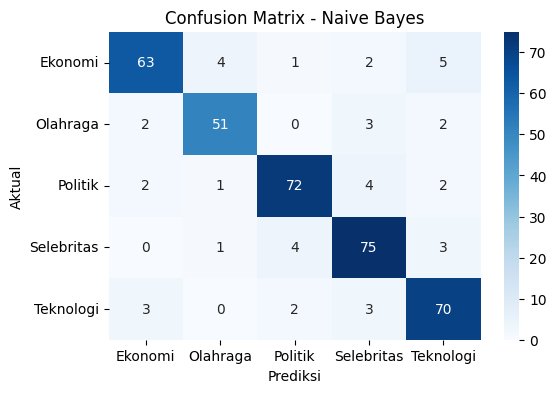

In [ ]:
print("Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# **EROR ANALISIS**

In [ ]:
# Gabungkan data aktual dan prediksi
error_df = X_test.copy()
error_df = pd.DataFrame({
    "Judul": X_test,
    "Aktual": y_test,
    "Prediksi": y_pred
})

# Tampilkan beberapa contoh yang salah prediksi
error_samples = error_df[error_df["Aktual"] != error_df["Prediksi"]]
print("Jumlah kesalahan prediksi:", len(error_samples))
error_samples.head(10)


Jumlah kesalahan prediksi: 44


,Judul,Aktual,Prediksi
845,<Compressed Sparse Row sparse matrix of dtype ...,Olahraga,Selebritas
746,<Compressed Sparse Row sparse matrix of dtype ...,Ekonomi,Politik
1106,<Compressed Sparse Row sparse matrix of dtype ...,Selebritas,Politik
966,<Compressed Sparse Row sparse matrix of dtype ...,Olahraga,Ekonomi
1236,<Compressed Sparse Row sparse matrix of dtype ...,Selebritas,Politik
654,<Compressed Sparse Row sparse matrix of dtype ...,Ekonomi,Teknologi
398,<Compressed Sparse Row sparse matrix of dtype ...,Ekonomi,Olahraga
998,<Compressed Sparse Row sparse matrix of dtype ...,Olahraga,Selebritas
344,<Compressed Sparse Row sparse matrix of dtype ...,Politik,Selebritas
798,<Compressed Sparse Row sparse matrix of dtype ...,Olahraga,Selebritas


/tmp/ipython-input-2926211908.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette="Reds")


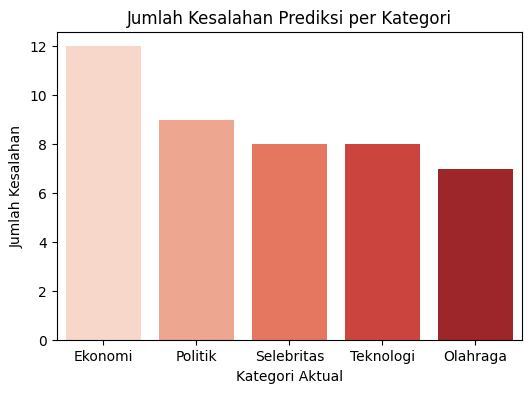

In [ ]:
# Hitung kesalahan per kategori
error_counts = error_samples["Aktual"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=error_counts.index, y=error_counts.values, palette="Reds")
plt.title("Jumlah Kesalahan Prediksi per Kategori")
plt.xlabel("Kategori Aktual")
plt.ylabel("Jumlah Kesalahan")
plt.show()

**Kesimpulan**

Berdasarkan hasil evaluasi model Multinomial Naive Bayes pada data teks berita, model memperoleh akurasi sebesar 88%.
Hasil classification report menunjukkan bahwa beberapa kategori memiliki nilai precision dan recall yang seimbang, namun terdapat perbedaan performa antar kelas.

Dari hasil error analysis, diketahui bahwa:

Kesalahan terbanyak terjadi pada kategori Ekonomi, yang sering diprediksi sebagai Politik.

Hal ini menunjukkan bahwa teks pada kedua kategori memiliki kemiripan kosakata (misalnya kata “pemerintah”, “investasi”, “kebijakan”), sehingga model sulit membedakan konteksnya.

Jumlah total kesalahan prediksi sebanyak 44 kasus, dengan distribusi kesalahan tertinggi pada kategori Ekonomi (12 kesalahan) dan terendah pada Olahraga (7 kesalahan).

Secara keseluruhan, model sudah mampu melakukan klasifikasi dengan baik pada teks berita yang bersifat khas seperti Olahraga dan Teknologi, namun masih perlu peningkatan untuk kategori yang memiliki kemiripan topik.

# **LSTM**

In [ ]:
import pandas as pd

# Baca dataset hasil preprocessing
df = pd.read_csv("/content/berita_clean.csv")

# Cek 5 data pertama
df.head()

,JUDUL,KATEGORI,tokens,stemmed
0,ppp konflik di ancol padam di kuningan,Politik,"['ppp', 'konflik', 'ancol', 'padam', 'kuningan']",ppp konflik ancol padam kuningan
1,adu jotos muktamar partai kabah,Politik,"['adu', 'jotos', 'muktamar', 'partai', 'kabah']",adu jotos muktamar partai kabah
2,melihat ketahanan otoritarianisme demokratis,Politik,"['ketahanan', 'otoritarianisme', 'demokratis']",tahan otoritarianisme demokratis
3,ekonomi politik seafood,Politik,"['ekonomi', 'politik', 'seafood']",ekonomi politik seafood
4,jokowi kumpul dengan elite psi di bali beri in...,Politik,"['jokowi', 'kumpul', 'elite', 'psi', 'bali', '...",jokowi kumpul elite psi bal instruksi


In [ ]:
df = pd.read_csv("berita_clean.csv")

df["text_joined"] = df["stemmed"].apply(lambda x: " ".join(x))
X = df["text_joined"]
y = df["KATEGORI"]

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

X_seq = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)

Vocab size: 28


In [ ]:
max_len = max(len(s) for s in X_seq)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')
print("Max Length:", max_len)

Max Length: 73


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

y_cat = to_categorical(y_encoded, num_classes=num_classes)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_cat
)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dropout, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),

    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.2141 - loss: 1.6093 - val_accuracy: 0.2233 - val_loss: 1.6081
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.2644 - loss: 1.5981 - val_accuracy: 0.3333 - val_loss: 1.5617
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.3278 - loss: 1.5405 - val_accuracy: 0.2967 - val_loss: 1.4950
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.3514 - loss: 1.4923 - val_accuracy: 0.3433 - val_loss: 1.4821
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.3454 - loss: 1.4683 - val_accuracy: 0.3633 - val_loss: 1.4723
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.3989 - loss: 1.4291 - val_accuracy: 0.3433 - val_loss: 1.4706
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3984 - loss: 1.4288 - val_accuracy: 0.3933 - val_loss: 1.4440
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.3901 - loss: 1.4443 - val_accuracy: 0.376

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Akurasi Test:", round(acc * 100, 2), "%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4102 - loss: 1.3641
Akurasi Test: 42.4 %


In [ ]:
sample = ["harga bitcoin naik tajam"]
sample_seq = tokenizer.texts_to_sequences(sample)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding="post")

pred = model.predict(sample_pad)
label = label_encoder.inverse_transform([pred.argmax()])[0]

print("Prediksi kategori:", label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
Prediksi kategori: Ekonomi


# **INDOBERT**

# 1. Install library

In [1]:
!pip install transformers datasets torch scikit-learn --quiet

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
import torch
from sklearn.preprocessing import LabelEncoder

# 2. Load dataset

In [36]:
import pandas as pd

df = pd.read_csv("berita_clean.csv")
df = df[['stemmed', 'KATEGORI']]
df.head()

,stemmed,KATEGORI
0,ppp konflik ancol padam kuningan,Politik
1,adu jotos muktamar partai kabah,Politik
2,tahan otoritarianisme demokratis,Politik
3,ekonomi politik seafood,Politik
4,jokowi kumpul elite psi bal instruksi,Politik


# 3. Encode Label

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["KATEGORI"])
num_labels = df["label"].nunique()

df.head()

,stemmed,KATEGORI,label
0,ppp konflik ancol padam kuningan,Politik,2
1,adu jotos muktamar partai kabah,Politik,2
2,tahan otoritarianisme demokratis,Politik,2
3,ekonomi politik seafood,Politik,2
4,jokowi kumpul elite psi bal instruksi,Politik,2


# 4. Train–Test Split

In [38]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_df.shape, test_df.shape

((1498, 3), (375, 3))

# 5. Convert ke Dataset HuggingFace

In [40]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# 6. Load Tokenizer IndoBERT

In [41]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# 7. Tokenisasi Dataset

In [42]:
def tokenize(batch):
    return tokenizer(
        batch["stemmed"],
        padding="max_length",
        truncation=True,
        max_length=64
    )

train_tokenized = train_ds.map(tokenize, batched=True)
test_tokenized = test_ds.map(tokenize, batched=True)

Map:   0%|          | 0/1498 [00:00<?, ? examples/s]

Map:   0%|          | 0/375 [00:00<?, ? examples/s]

# 8. Load Model IndoBERT

In [43]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 9. TrainingArguments

In [44]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",      # pengganti evaluation_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_steps=20,
    report_to="none"            # matikan wandb otomatis
)

# 10. Metric Akurasi (pakai evaluate)

In [46]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00


In [47]:
import evaluate

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# 11. Trainer

In [48]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-3412620493.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


# 12. Train Model

In [49]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.411100,0.377784,0.880000
2,0.321400,0.430439,0.866667
3,0.092400,0.417559,0.904000
4,0.021900,0.456496,0.885333


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=376, training_loss=0.267802034048958, metrics={'train_runtime': 5026.1925, 'train_samples_per_second': 1.192, 'train_steps_per_second': 0.075, 'total_flos': 197075488705536.0, 'train_loss': 0.267802034048958, 'epoch': 4.0})

# 13. Evaluasi Akurasi

In [50]:
results = trainer.evaluate()
print("Akurasi IndoBERT :", results["eval_accuracy"])

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Akurasi IndoBERT : 0.8853333333333333


# 14. Fungsi Prediksi

In [51]:
import torch

def predict(text):
    enc = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=64)
    outputs = model(**enc)
    probs = torch.softmax(outputs.logits, dim=1)
    pred_class = probs.argmax().item()

    kategori = le.inverse_transform([pred_class])[0]
    confidence = float(probs[0][pred_class])

    return kategori, confidence

# 15. Contoh Prediksi

In [52]:
predict("jokowi resmi umumkan kebijakan ekonomi baru")

/tmp/ipython-input-398091546.py:10: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  confidence = float(probs[0][pred_class])


('Ekonomi', 0.9929672479629517)

In [53]:
predict("timnas indonesia menang lawan australia")

('Olahraga', 0.9946194887161255)